#### Name: Kefan Zheng
#### StudentId: 9086175008
#### Email: kzheng58@wisc.edu

# Problem 1-1

define following notations:  
$N$: the set of Nodes  
$A$: the set of Arcs  
$x_{ij}$: the flow of the arc from Node i to Node j  
$u_{ij}$: the capacity of the arc from Node i to Node j

\begin{align}
\underset{x_{ij}}{\max}\ & x_{ts} & \\
\text{s.t.}\ & \sum_{j:(i,j) \in A} x_{ij} - \sum_{j:(j,i) \in A} x_{ji} = 0,\quad \forall i \in N&\\
& x_{ij} \leq u_{ij}, \quad \forall (i,j) \in A &\\
& x_{ij} \geq 0, \quad \forall (i,j) \in A &\\
\end{align}

Matrix forms:  
\begin{align}
\underset{x_{ij}}{\max}\ & x_{ts} & \\
\text{s.t.}
\ &
\begin{bmatrix}
1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & -1 \\
-1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & -1 & 0 & 1 & -1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 1 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x_{s1} \\
x_{s2} \\
x_{12} \\
x_{13} \\
x_{24} \\
x_{32} \\
x_{3t} \\
x_{4t} \\
x_{ts} \\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix} 
& \\
\ &
\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix} 
\leq
\begin{bmatrix}
x_{s1} \\
x_{s2} \\
x_{12} \\
x_{13} \\
x_{24} \\
x_{32} \\
x_{3t} \\
x_{4t} \\
\end{bmatrix} 
\leq
\begin{bmatrix}
6 \\
2 \\
1 \\
3 \\
7 \\
3 \\
2 \\
7 \\
\end{bmatrix} 
& \\
\end{align}

# Problem 1-2

\begin{align}
\underset{}{\min} \ & \sum_{(i,j) \in A} u_{ij}\lambda_{ij} &\\
\text{s.t.}
\ & \mu_i - \mu_j + \lambda_{ij} \geq 0, \quad \forall (i,j) \in A &\\
\ & \mu_t - \mu_s \geq 1 &\\
\ & \mu_i \text{ free}, \quad \forall i \in N &\\
\ & \lambda_{ij} \geq 0, \quad \forall (i,j) \in A &\\
\end{align}
where for any cut $(S, \bar{S})$:
$$
\mu_i = 
\begin{cases} 
1 & \text{if } i \in \bar{S} \\
0 & \text{otherwise}
\end{cases}
$$
$$
\lambda_{ij} = 
\begin{cases} 
1 & \text{if } (i,j) \in A, i \in S, j \in \bar{S} \\
0 & \text{otherwise}
\end{cases}
$$

Matrix forms:  
\begin{align}
\underset{\lambda_{ij}, \mu_{i}}{\min}\ & 6\lambda_{s1} + 2\lambda_{s2} + \lambda_{12} + 3\lambda_{13} + 7\lambda_{24} + 3\lambda_{32} + 2\lambda_{3t} + 7\lambda_{4t} & \\
\text{s.t.}
\ &
\begin{bmatrix}
-1 & 0 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 & 0 \\
1 & -1 & 0 & 0 & 0 \\
1 & 0 & -1 & 0 & 0 \\
0 & 1 & 0 & -1 & 0 \\
0 & -1 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & -1 \\
0 & 0 & 0 & 1 & -1 \\
0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
\mu_{1} \\
\mu_{2} \\
\mu_{3} \\
\mu_{4} \\
\mu_{t} \\
\end{bmatrix}
+
\begin{bmatrix}
\lambda_{s1} \\
\lambda_{s2} \\
\lambda_{12} \\
\lambda_{13} \\
\lambda_{24} \\
\lambda_{32} \\
\lambda_{3t} \\
\lambda_{4t} \\
0 \\
\end{bmatrix}
\geq
\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
1 \\
\end{bmatrix} 
& \\
\ & \lambda_{ij} \geq 0, \quad \mu_{i} \text{ free} & \\
\end{align}

# Problem 1-3

In [1]:
# data
s = Set([Symbol("source")])
t = Set([Symbol("sink")])
nodes = Set(Symbol("n" * string(i)) for i in 1:4)
N = Set{Symbol}()
N = union(s, t, nodes)
A = Set{Tuple}()
A = Set([(:source, :n1), (:source, :n2), (:n1, :n2), (:n1, :n3), (:n2, :n4), (:n3, :n2), (:n3, :sink), (:n4, :sink), (:sink, :source)])

c = Dict((i, j) => 0 for (i, j) in A)
c[:sink, :source] = -1.0

b = Dict(i => 0 for i in N)

u = Dict{Tuple, Float32}()
u[(:source, :n1)] = 6
u[(:source, :n2)] = 2
u[(:n1, :n2)] = 1
u[(:n1, :n3)] = 3
u[(:n2, :n4)] = 7
u[(:n3, :n2)] = 3
u[(:n3, :sink)] = 2
u[(:n4, :sink)] = 7
u[(:sink, :source)] = Inf

# model
using JuMP, HiGHS, Ipopt

m = Model(Ipopt.Optimizer)

@variable(m, 0 <= x[a in A] <= u[a])

@objective(m, Max, x[(:sink, :source)])

@constraint(m, flow_balance[i in N], sum(x[(i, j)] for j in N if (i, j) in A) - sum(x[(j, i)] for j in N if (j, i) in A) == b[i])

optimize!(m)

println("Max Flow: ", objective_value(m))


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:       18
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        9
                     variables with only lower bounds:        1
                variables with lower and upper bounds:        8
                     variables with only upper bounds:        0
Total number of equality constraints.................:        6
Total number of inequality c

# Problem 1-4

In [2]:
println("Capacity and Flow on each arc:")
for a in A
    println("Arc ", a, " Capacity: ", u[a], " Flow: ",value(x[a]))
end

Capacity and Flow on each arc:
Arc (:source, :n1) Capacity: 6.0 Flow: 4.000000038181819
Arc (:sink, :source) Capacity: Inf Flow: 6.000000057272727
Arc (:n1, :n2) Capacity: 1.0 Flow: 1.0000000090909091
Arc (:n4, :sink) Capacity: 7.0 Flow: 4.184352121461475
Arc (:n1, :n3) Capacity: 3.0 Flow: 3.000000029090909
Arc (:n2, :n4) Capacity: 7.0 Flow: 4.184352121461475
Arc (:source, :n2) Capacity: 2.0 Flow: 2.000000019090909
Arc (:n3, :sink) Capacity: 2.0 Flow: 1.8156479358112516
Arc (:n3, :n2) Capacity: 3.0 Flow: 1.1843520932796574


From the optimal solution of the primal problem, we know that **Arc[(:n1, :n2), (:n1, :n3), (:source, :n2)]**'s capacity is equal to the actual flow, that is, its corresponding constraints are tight. According to the complementary slackness theory, if the constraint of the primal problem is tight, then the corresponding variable of the dual problem is not 0; if the constraint of the primal problem is loose, then the corresponding dual variable is 0. So the optimal dual solution is:  
$$
\lambda_{s1} = 0, \quad \lambda_{s2} = 1, \quad \lambda_{12} = 1, \quad \lambda_{13} = 1
$$
$$
\lambda_{24} = 0, \quad \lambda_{32} = 0, \quad \lambda_{3t} = 0, \quad \lambda_{4t} = 0, \quad \lambda_{ts} = 0
$$

# Problem 1-5

A cut is a partition of the node set $(S, \bar{S})$ where the source node $s \in S$ and the sink node $t \in \bar{S}$. The edges that cross the cut are $\{(i,j) \in A: i \in S, j \in \bar{S}\}$.  
According to the result from problem 1-4, we can get:
$$S = \{s, 1\}$$
$$\bar{S} = \{2,3,4,t\}$$
$$cut = (S, \bar{S})$$
The capacity of the cut is 6.

# Problem 2-1

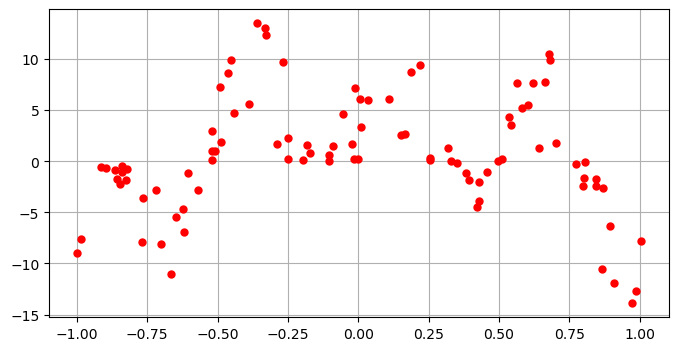

In [3]:
using PyPlot, CSV, DataFrames

data = CSV.read("lasso-data.csv", DataFrame)
x = data[:,1]
y = data[:,2]

# cla()
figure(figsize=(8,4))
plot(x,y,"r.", markersize=10)
grid("True")
# Only need this line if using vscode?
# display(gcf())

In [4]:
k = 6
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(HiGHS.Optimizer)

@variable(m, u[1:k+1])

@objective(m, Min, sum((y - A*u).^2))

optimize!(m)

# print coefficient
coef_6 = [value(u[i]) for i in 1:k+1]
println("The polynomial coefficients are: ", coef_6)

# print error
error = objective_value(m)
println("The error (total squared residuals) is: ", error)

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Iteration, Runtime, ObjVal, NullspaceDim
0, 0.001206, 3073.967606, 7
3, 0.001413, 1607.360992, 7
Model   status      : Optimal
Objective value     :  1.6073609922e+03
HiGHS run time      :          0.00
The polynomial coefficients are: [-2.249371900396229, -41.30577606533521, -8.493550837855988, 43.82460620435696, -1.8469776466959757, -8.539113160802808, 3.375813786151018]
The error (total squared residuals) is: 1607.3609921595705


# Problem 2-2

In [5]:
k = 18
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(HiGHS.Optimizer)

@variable(m, u[1:k+1])

@objective(m, Min, sum((y - A*u).^2))

optimize!(m)

# print coefficient
coef_18 = [value(u[i]) for i in 1:k+1]
println("The polynomial coefficients are: ", coef_18)

# print error
error = objective_value(m)
println("The error (total squared residuals) is: ", error)

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Iteration, Runtime, ObjVal, NullspaceDim
0, 0.000143, 3073.967606, 19
3, 0.000236, 522.039311, 19
Model   status      : Optimal
Objective value     :  5.2203999098e+02
HiGHS run time      :          0.00
The polynomial coefficients are: [-85777.96987569737, -34190.35284858116, 391618.11446229444, 145410.400856986, -743933.078416506, -248442.9827777201, 761790.0455611285, 214415.78339220045, -455126.1937070716, -93662.63157967123, 160101.09152807322, 15385.569783950783, -31648.88748634598, 1765.1586151727297, 3070.4161891439185, -713.8251991827888, -106.44740057256564, 33.180843520283986, 3.92627202618853]
The error (total squared residuals) is: 522.0399909810724


# Problem 2-3

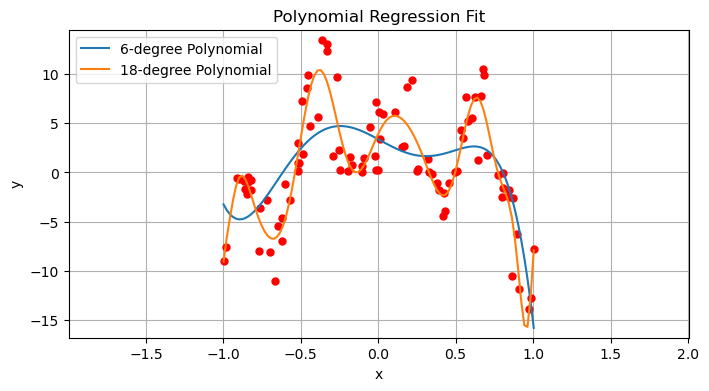

In [6]:
function plotwregsol_6_18(x,y,coef_6,coef_18)

    minx = minimum(x)
    maxx = maximum(x)   
    miny = minimum(y)
    maxy = maximum(y) 

    # Make (npts,k+1) matrix containing polynomial term values at plot points.  Fancy matrix stuff.
    npts = 100
    xfine = range(minx,stop=maxx,length=npts)
    # 6 degree
    k = 6
    ffine_6 = ones(npts)
    for j = 1:k
        ffine_6 = [ffine_6.*xfine ones(npts)]
    end
    # 18 degree
    k = 18
    ffine_18 = ones(npts)
    for j = 1:k
        ffine_18 = [ffine_18.*xfine ones(npts)]
    end

    # Compute the estimate values
    yfine_6 = ffine_6 * coef_6
    yfine_18 = ffine_18 * coef_18

    miny_6 = minimum(yfine_6)
    maxy_6 = maximum(yfine_6)
    miny_18 = minimum(yfine_18)
    maxy_18 = maximum(yfine_18)
    miny = min(miny, miny_6)
    miny = min(miny, miny_18)
    maxy = max(maxy, maxy_6)
    maxy = max(maxy, maxy_18)

    # Plot 'em
    figure(figsize=(8,4))
    plot(x,y,"r.", markersize=10)
    plot(xfine, yfine_6, label="6-degree Polynomial")
    plot(xfine, yfine_18, label="18-degree Polynomial")
    legend()

    axis([minx-1,maxx+1,miny-1,maxy+1])
    title("Polynomial Regression Fit")
    xlabel("x")
    ylabel("y")

    grid()
end

plotwregsol_6_18(x, y, coef_6, coef_18)

# Problem 2-4

In [7]:
function lasso_solve(lambda)
    k = 18
    n = length(x)
    A = zeros(n,k+1)
    for i = 1:n
        for j = 1:k+1
            A[i,j] = x[i]^(k+1-j)
        end
    end
    
    m = Model(Ipopt.Optimizer)
    set_optimizer_attribute(m, "print_level", 0)
    
    @variable(m, u[1:k+1])
    @variable(m, absolute[1:k+1] >= 0)

    @objective(m, Min, sum((y - A*u).^2) + lambda * sum(absolute))

    for i in 1:k+1
        @constraint(m, absolute[i] >= u[i])
        @constraint(m, absolute[i] >= -u[i])
    end
    
    optimize!(m)

    return m, u, absolute
end

coef_18_lasso = zeros(19)
for lambda in 0:0.01:10
    m, u, absolute = lasso_solve(lambda)
    coef_absolute = [value(absolute[i]) for i in 1:19]
    if sum(coef_absolute .> 1.0e-4) <= 6
        # print lambda
        println("Lambda: ", lambda)
        
        # print coefficient
        coef_18_lasso = [value(u[i]) for i in 1:19]
        println("The polynomial coefficients are: ", coef_18_lasso)
        
        # print error
        error = objective_value(m)
        println("The error (total squared residuals) is: ", error)
        break
    end
end

Lambda: 5.19
The polynomial coefficients are: [-6.316953353263888e-9, 0.5038857563244048, -1.328207396480901e-8, 1.0361010158735946e-9, -4.664819698528518e-8, 1.521292851313325e-10, -4.90417337488678e-6, -5.135688950135093e-10, -8.103780315180952e-8, -2.8135490745032087e-9, -2.100661549560538e-8, -8.593830800505533, -1.4613565374593364e-8, -7.207402377235007e-10, -11.86038697715727, 4.794662137813722, -0.4212125525024445, -2.8493456809995037e-10, 3.220016970163763]
The error (total squared residuals) is: 1903.4181761228658


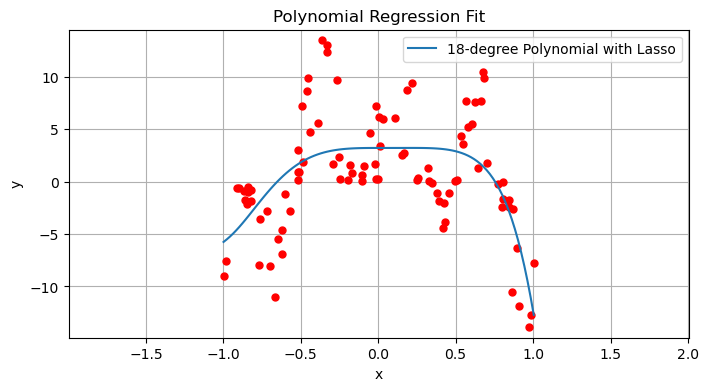

PyObject Text(24.000000000000007, 0.5, 'y')

In [8]:
function plotwregsol_lasso(x,y,coef)

    minx = minimum(x)
    maxx = maximum(x)
    miny = minimum(y)
    maxy = maximum(y)   

    # Make (npts,k+1) matrix containing polynomial term values at plot points.  Fancy matrix stuff.
    k = 18
    npts = 100
    xfine = range(minx,stop=maxx,length=npts)
    ffine = ones(npts)
    for j = 1:k
        ffine = [ffine.*xfine ones(npts)]
    end

    # Compute the estimate values
    yfine = ffine * coef
    miny_lasso = minimum(yfine)
    maxy_lasso = maximum(yfine)
    miny = min(miny, miny_lasso)
    maxy = max(maxy, maxy_lasso)

    # Plot 'em
    figure(figsize=(8,4))
    plot(x,y,"r.", markersize=10)
    plot(xfine, yfine, label="18-degree Polynomial with Lasso")
    legend()

    axis([minx-1,maxx+1,miny-1,maxy+1])

    grid()
    title("Polynomial Regression Fit")
    xlabel("x")
    ylabel("y")
end

plotwregsol_lasso(x,y,coef_18_lasso)

# Problem 3-1

\begin{align}
\underset{}{\max} \ & \sum_{r \in T} \tau_{r} - \lambda \sum_{r \in N} \Delta_{r} & \\
\text{s.t.} \ & \tau_{r} = \sum_{b \in B} a_{br}x_{b},\quad \forall r \in T &\\
& \Delta_{r} >= \sum_{b \in B} a_{br}x_{b} - p_{r}, \quad \forall r \in N &\\
& \Delta_{r} >= 0, \quad \forall r \in N &\\
& 0 \leq x_{b} \leq W_{b}, \quad \forall b \in B &\\
\end{align}

# Problem 3-2

In [9]:
function solveOpt(lambda)
    # data
    B = 1:6
    Wb = 3
    pr = 65
    N = 1:3
    T = 4:6
    a = [15 7 8 12 12 6; 13 4 12 19 15 14; 9 8 13 13 10 17; 4 12 12 6 18 16; 9 4 11 13 6 14; 8 7 7 10 10 10]
    
    # model
    m = Model(HiGHS.Optimizer)
    set_silent(m)
    
    @variable(m, 0 <= x[b in B] <= Wb)
    @variable(m, Delta[r in N] >= 0)
    @variable(m, tau[r in T])
    
    @objective(m, Max, sum(tau) - lambda * sum(Delta))
    
    @constraint(m, GoodDose[r in T], tau[r] == sum(a[b,r] * x[b] for b in B))
    @constraint(m, DamageDose[r in N], Delta[r] >= sum(a[b,r] * x[b] for b in B) - pr)
    
    optimize!(m)
    return (x, tau, Delta)
end

x, tau, Delta = solveOpt(1)
println("Beam weights: ", value.(x))
println("Tumor doses: ", value.(tau))
println("Total dose to the tumor region: ", sum(value.(tau)))
println("Normal tissue damages: ", value.(Delta))
println("Total dose to the normal region: ", sum(value.(Delta)))

Beam weights: 1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 1:6
And data, a 6-element Vector{Float64}:
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
Tumor doses: 1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 4:6
And data, a 3-element Vector{Float64}:
 219.0
 213.0
 231.0
Total dose to the tumor region: 663.0
Normal tissue damages: 1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 1:3
And data, a 3-element Vector{Float64}:
 109.0
  61.0
 124.0
Total dose to the normal region: 294.0


# Problem 3-3

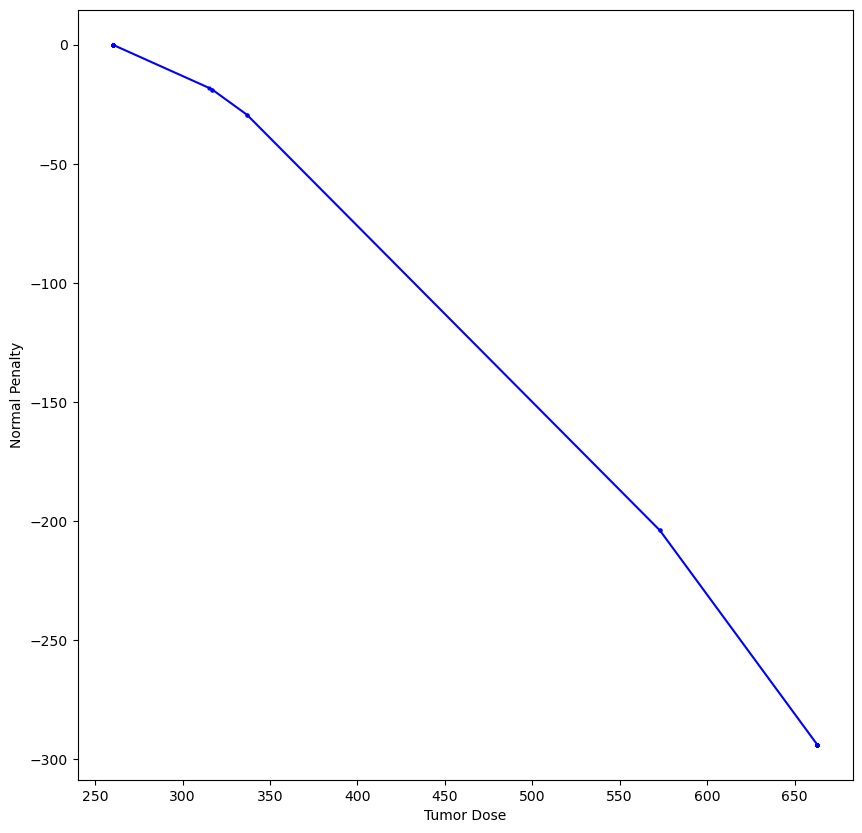

PyObject Text(24.0, 0.5, 'Normal Penalty')

In [10]:
Npts = 30
tumor_dose = zeros(Npts)
normal_penalty = zeros(Npts)
for (i, lambda) in enumerate(10 .^ (range(-1,stop=1,length=Npts)))
    (x, tau, Delta) = solveOpt(lambda)
    tumor_dose[i] = sum(value.(tau))
    normal_penalty[i] = -sum(value.(Delta))
end

function paretoPlot(x,y)
    figure(figsize=(10,10))
    plot( x, y, "b.-", markersize=4)
    xlabel("Tumor Dose")
    ylabel("Normal Penalty")
    # Only need this in vscode?
    # display(gcf())
end
;

paretoPlot(tumor_dose, normal_penalty)

# Problem 4-1

In [11]:
using LinearAlgebra

Q = [0 0 -2 -4 0 1; 0 1 -1 -1 3 -4; -2 -1 -1 -5 7 -4; -4 -1 -5 -3 7 -2; 0 3 7 7 -1 -2; 1 -4 -4 -2 -2 0]

eigenvalues = eigen(Q).values
eigenvectors = eigen(Q).vectors

for i in 1:length(eigenvalues)
    println("Eigenvalue and eigenvector ", i, ": ")
    println(eigenvalues[i])
    println(eigenvectors[:, i])
    println()
end

Eigenvalue and eigenvector 1: 
-16.11909446064489
[-0.1987242977523469, -0.197556001253088, -0.5224071070766683, -0.5828949996148007, 0.528041265986293, -0.1731384855171353]

Eigenvalue and eigenvector 2: 
-3.7566481293641356
[0.34454207606212667, -0.48321415505502313, -0.12955757672414325, 0.20288580391709257, -0.19859106643536195, -0.7418952833059451]

Eigenvalue and eigenvector 3: 
-0.5922928569671946
[0.7381140909502316, -0.08982267386571899, -0.05559540037785556, 0.21880615104455992, 0.5378837171867339, 0.3268540997258541]

Eigenvalue and eigenvector 4: 
2.2331144580905438
[0.2365002066186307, 0.758157947138062, -0.5375521373305713, 0.07945936608368989, -0.14657878781811945, -0.22913477958491651]

Eigenvalue and eigenvector 5: 
3.845741541835812
[0.43251242371642257, 0.20495876850846464, 0.48302190937691003, -0.7018253449914204, -0.11575000585619687, -0.17792656596553236]

Eigenvalue and eigenvector 6: 
10.389179447049866
[0.23235243843489226, -0.3203061416611552, -0.4300492238793

# Problem 4-2

In [12]:
c = [-1,0,2,-2,4,0]

# model
m = Model(HiGHS.Optimizer)
# set_silent(m)

@variable(m, 0 <= x[1:6] <= 1)

@objective(m, Min, x' * Q * x + c' * x)

optimize!(m)

println("Solver terminated with status ", termination_status(m))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
ERROR:   Hessian has 3 diagonal entries in [-6, 0) so is not positive semidefinite for minimization
ERROR:   Cannot solve non-convex QP problems with HiGHS
Model   status      : Not Set
HiGHS run time      :          0.00
Solver terminated with status OTHER_ERROR


# Problem 4-3

Because $Q \in \mathbb{R}^{n \times n}$ is a real symmetric, so:
$$
Q = PAP^T
$$
where $P$ is an orthogonal matrix, each column is an eigenvector of $Q$. And $A = \begin{bmatrix}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{n}
\end{bmatrix}$, each diagonal element is the eigenvalue of $Q$.  
Because $P$ is an orthogonal matrix, so:  
$$
I = PP^T = PIP^T
$$
So according to the transformation mentioned above and matrix distributive property, we have:
\begin{align}
Q - \lambda_{1}I &= PAP^T - \lambda_{1}PIP^T \\  
&= PAP^T - P\lambda_{1}IP^T \\  
&= P(A-\lambda_{1}I)P^T \\
\end{align}
And
$$
A-\lambda_{1}I = \begin{bmatrix}
0 & 0 & \cdots & 0 \\
0 & \lambda_{2}-\lambda_{1} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{n}-\lambda_{1}
\end{bmatrix}
$$ 
**A matrix $M$ is positive semidefinite (PSD) if the real number $x^TMx$ is non-negative for every non-zero real column vector $x$.**  
Each diagonal element of $A$ is an eigenvalue of $Q$, and $\lambda_{1}$ is the smallest eigenvalue of $Q$, so the diagonal elements of $A-\lambda_{1}I$ are all non-negative. So for every non-zero vector $x \in \mathbb{R}^{n}$, there is $x^T(A-\lambda_{1}I)x = \sum_{i=1}^{n} (\lambda_{i}-\lambda_{1})x_{i}^2 >= 0$, that is, $A-\lambda_{1}I$ is positive semidefinite (PSD).  
\begin{align}
x^T(Q-\lambda_{1}I)x &= x^T(P(A-\lambda_{1}I)P^T)x \\
&= x^TP(A-\lambda_{1}I)P^Tx \\
&= (P^Tx)^T(A-\lambda_{1}I)(P^Tx)
\end{align}
Because $P$ is an orthogonal matrix, so $P^T$ is also orthogonal, so $P^Tx$ is still non-zero for every non-zero vector $x$.  
Because $P^Tx$ is non-zero and $A-\lambda_{1}I$ is positive semidefinite (PSD), so $(P^Tx)^T(A-\lambda_{1}I)(P^Tx)$ is non-negative, that is, $x^T(Q-\lambda_{1}I)x$ is non-negative.   
Because for every non-zero vector $x$, $x^T(Q-\lambda_{1}I)x$ is non-negative, so $Q-\lambda_{1}I$ is positive semidefinite (PSD).  

# Problem 4-4

In [13]:
Q = Q - eigenvalues[1] * I

# model
m = Model(HiGHS.Optimizer)
# set_silent(m)

@variable(m, 0 <= x[1:6] <= 1)

@objective(m, Min, x' * Q * x + c' * x)

optimize!(m)

println("Solver terminated with status ", termination_status(m))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Iteration, Runtime, ObjVal, NullspaceDim
0, 0.000131, 0.000000, 0
9, 0.000179, -0.121812, 4
Model   status      : Optimal
Objective value     : -1.2181234180e-01
HiGHS run time      :          0.00
Solver terminated with status OPTIMAL


# Problem 5-1

In [14]:
# model
m = Model(HiGHS.Optimizer)
# set_silent(m)

@variable(m, ua[1:2, 1:60])
@variable(m, up[1:2, 1:60])
@variable(m, xa[1:2, 1:60])
@variable(m, xp[1:2, 1:60])
@variable(m, va[1:2, 1:60])
@variable(m, vp[1:2, 1:60])

@objective(m, Min, sum(ua.^2) + sum(up.^2))

@constraint(m, xa[:, 1] == [0, 0])
@constraint(m, xp[:, 1] == [0.5, 0])
@constraint(m, va[:, 1] == [0, 20])
@constraint(m, vp[:, 1] == [30, 0])
@constraint(m, xa[:, 60] == xp[:, 60])
for t in 1:59
    @constraint(m, xa[:, t+1] == xa[:, t] + 1/3600 .* va[:, t])
    @constraint(m, xp[:, t+1] == xp[:, t] + 1/3600 .* vp[:, t])
    @constraint(m, va[:, t+1] == va[:, t] + ua[:, t])
    @constraint(m, vp[:, t+1] == vp[:, t] + up[:, t])
end

optimize!(m)

println("Solver terminated with status ", termination_status(m))
println()
println("Minimum total energy required: ", objective_value(m))
println("Final rendezvous location: x=", value(xa[1, 60]), ", y=", value(xa[2, 60]))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Iteration, Runtime, ObjVal, NullspaceDim
0, 0.000895, 6810500.000000, 238
481, 0.035846, 105.930705, 238
Model   status      : Optimal
Objective value     :  1.0593070479e+02
HiGHS run time      :          0.04
Solver terminated with status OPTIMAL

Minimum total energy required: 105.9307047910203
Final rendezvous location: x=0.4958333334205028, y=0.1638888889158931


# Problem 5-2

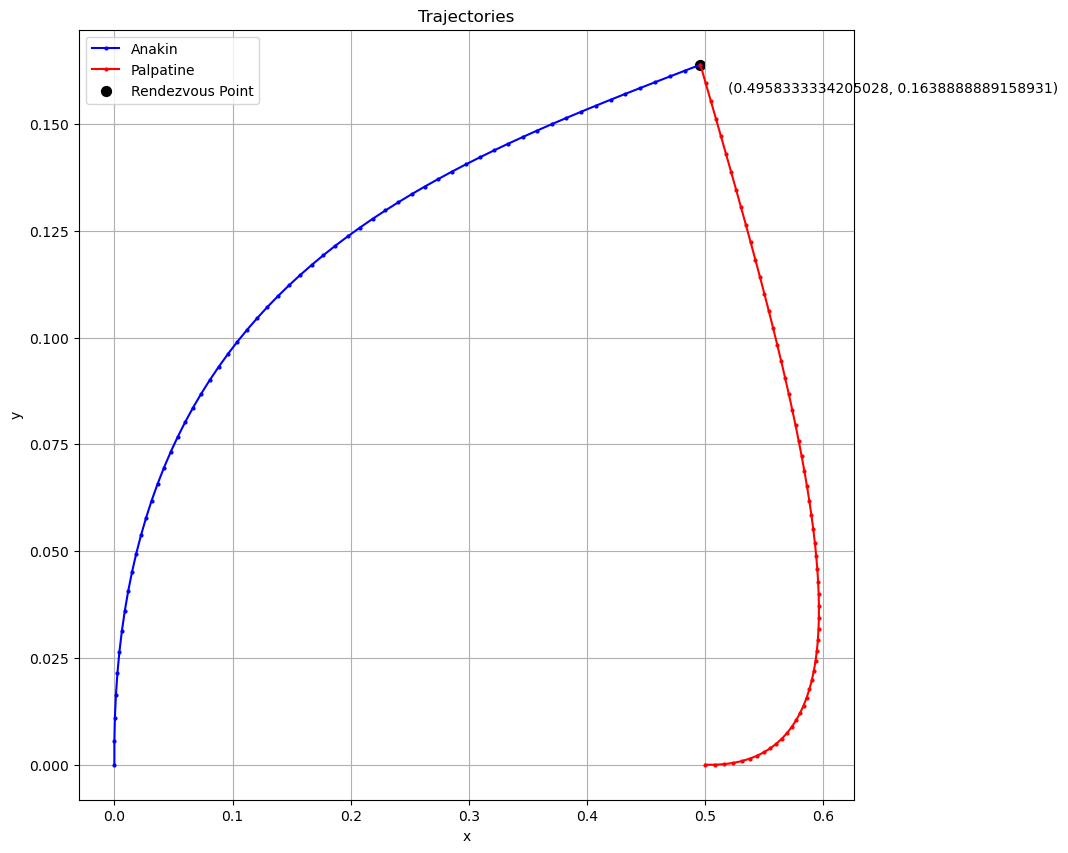

PyObject Text(24.0, 0.5, 'y')

In [15]:
figure(figsize=(10,10))
# plot anakin
x = value.(xa[1, :])
y = value.(xa[2, :])
plot(x, y, "b.-", markersize=4, label="Anakin")
# plot palpatine
x = value.(xp[1, :])
y = value.(xp[2, :])
plot(x, y, "r.-", markersize=4, label="Palpatine")

n = length(x)
final_x = x[n]
final_y = y[n]
scatter(final_x, final_y, s=50, color="black", label="Rendezvous Point")
annotate("($(final_x), $(final_y))", xy=[final_x; final_y], xytext=(20, -20), textcoords="offset points")

legend()
grid("True")
title("Trajectories")
xlabel("x")
ylabel("y")

# Problem 5-3

In [16]:
# model
m = Model(HiGHS.Optimizer)
# set_silent(m)

@variable(m, ua[1:2, 1:60])
@variable(m, up[1:2, 1:60])
@variable(m, xa[1:2, 1:60])
@variable(m, xp[1:2, 1:60])
@variable(m, va[1:2, 1:60])
@variable(m, vp[1:2, 1:60])

@objective(m, Min, sum(ua.^2) + sum(up.^2))

@constraint(m, xa[:, 1] == [0, 0])
@constraint(m, xp[:, 1] == [0.5, 0])
@constraint(m, va[:, 1] == [0, 20])
@constraint(m, vp[:, 1] == [30, 0])
@constraint(m, xa[:, 60] == xp[:, 60])
@constraint(m, va[:, 60] == [0, 0])
@constraint(m, vp[:, 60] == [0, 0])
for t in 1:59
    @constraint(m, xa[:, t+1] == xa[:, t] + 1/3600 .* va[:, t])
    @constraint(m, xp[:, t+1] == xp[:, t] + 1/3600 .* vp[:, t])
    @constraint(m, va[:, t+1] == va[:, t] + ua[:, t])
    @constraint(m, vp[:, t+1] == vp[:, t] + up[:, t])
end

optimize!(m)

println("Solver terminated with status ", termination_status(m))
println()
println("Minimum total energy required: ", objective_value(m))
println("Final rendezvous location: x=", value(xa[1, 60]), ", y=", value(xa[2, 60]))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Iteration, Runtime, ObjVal, NullspaceDim
0, 0.000984, 6810500.000000, 234
435, 0.122103, 245.587376, 234
Model   status      : Optimal
Objective value     :  2.4558737580e+02
HiGHS run time      :          0.12
Solver terminated with status OPTIMAL

Minimum total energy required: 245.58737580362384
Final rendezvous location: x=0.375000000020535, y=0.08333333333779809


# Problem 5-4

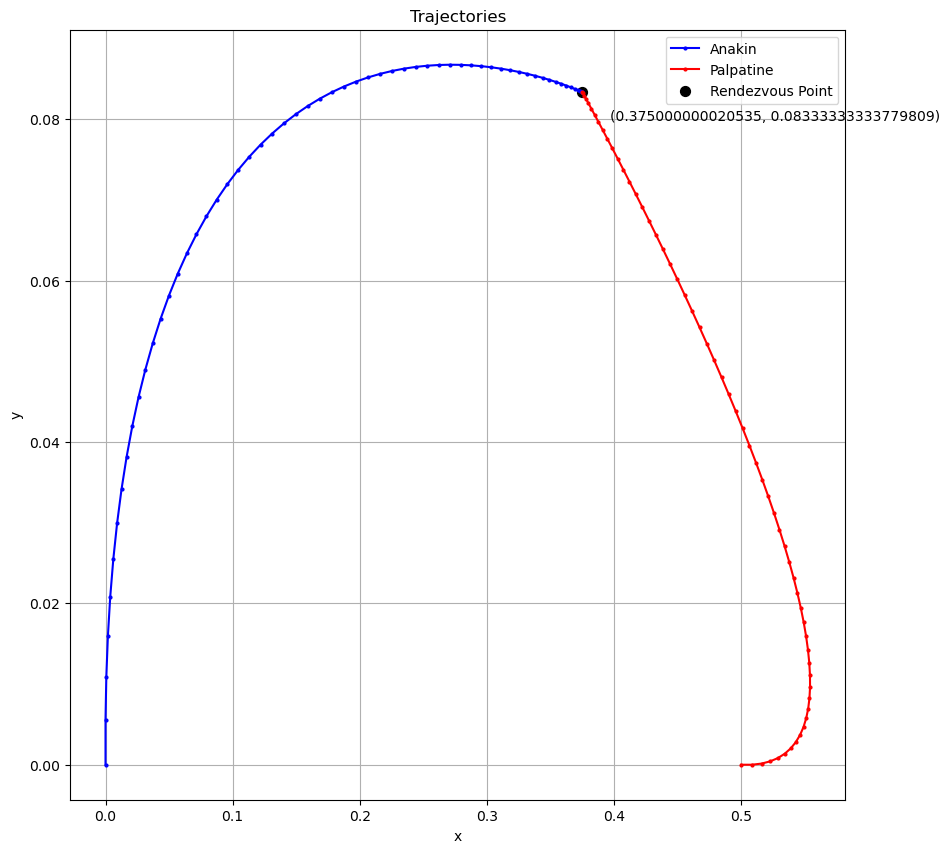

PyObject Text(24.000000000000007, 0.5, 'y')

In [17]:
figure(figsize=(10,10))
# plot anakin
x = value.(xa[1, :])
y = value.(xa[2, :])
plot(x, y, "b.-", markersize=4, label="Anakin")
# plot palpatine
x = value.(xp[1, :])
y = value.(xp[2, :])
plot(x, y, "r.-", markersize=4, label="Palpatine")

n = length(x)
final_x = x[n]
final_y = y[n]
scatter(final_x, final_y, s=50, color="black", label="Rendezvous Point")
annotate("($(final_x), $(final_y))", xy=[final_x; final_y], xytext=(20, -20), textcoords="offset points")

legend()
grid("True")
title("Trajectories")
xlabel("x")
ylabel("y")